In [1]:
import sys
import os
import numpy as np
import torch
from torch.utils.data import DataLoader, SubsetRandomSampler
import matplotlib.pyplot as plt


In [2]:
# Make it possible to import `pallets` from parent dir

sys.path.append(
    os.path.abspath(os.path.join(os.getcwd(), '..'))
)
from pallets import images, datasets, models


# Prepare Datasets

Create DataLoaders for both:

* the RGBA dataset
* the one-hot encoded dataset

In [3]:
# Unique colors for one punk

image = images.get_punk(0)
print(f"image shape: {image.shape}\n")

colors = images.one_image_colors(image)
print(f"image colors:\n{colors}")


image shape: (24, 24, 4)

image colors:
[[0.         0.         0.         0.        ]
 [0.         0.         0.         1.        ]
 [0.3137255  0.4862745  0.2        1.        ]
 [0.3647059  0.54509807 0.2627451  1.        ]
 [0.37254903 0.11372549 0.03529412 1.        ]
 [0.68235296 0.54509807 0.38039216 1.        ]
 [1.         0.9647059  0.5568628  1.        ]]


In [4]:
# Unique colors for all punks

all_colors = images.get_punk_colors()
print(f"colors found: {len(all_colors)}")


colors found: 222


### RGBA Dataset

In [21]:
print("soon")


soon


### One Hot Dataset

1. Generate a one hot representation for all 222 colors.

2. Instantiate a mapper to go from each color to its one hot representation and back.

3. Create dataloader for punks that represents its color data as one hot vectors.

In [6]:
# Mapper from color to one hot

mapper = datasets.ColorOneHotMapper(all_colors)
one_hot_encoded_image = datasets.rgb_to_one_hot(image, mapper)
print(f"single pixel as one hot:\n{one_hot_encoded_image[0][0]}")


single pixel as one hot:
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


In [7]:
# Start with a color
test_color = all_colors[2]
print(f"color:\n{test_color}\n")

# Convert color to one hot
test_one_hot = mapper.to_one_hot(test_color)
print(f"one-hot encoding:\n{test_one_hot}\n")

# Convert one hat back to original color
retrieved_color = mapper.to_color(test_one_hot)
print(f"retrieved color:\n{retrieved_color}")


color:
[0.        0.2509804 1.        1.       ]

one-hot encoding:
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]

retrieved color:
[0.        0.2509804 1.        1.       ]


In [8]:
# Punks Dataset

dataset = datasets.OneHotEncodedImageDataset(mapper, test_size=2000)
print(f"dataset size:   {len(dataset)}")
print(f"  - train size: {len(dataset.train_idx)}")
print(f"  - test size:  {len(dataset.test_idx)}\n")

train_sampler = SubsetRandomSampler(dataset.train_idx)
print(f"train sampler:  {len(train_sampler)}")
print(f"  - sample id:  {next(iter(train_sampler))}\n")

test_sampler = SubsetRandomSampler(dataset.test_idx)
print(f"test sampler:   {len(test_sampler)}")
print(f"  - sample id:  {next(iter(test_sampler))}\n")



dataset size:   10000
  - train size: 8000
  - test size:  2000

train sampler:  8000
  - sample id:  3331

test sampler:   2000
  - sample id:  7792



# Prepare DataLoaders

In [9]:
# Punks DataLoader

batch_size = 32
shuffle = True
num_workers = 4

train_loader = DataLoader(
    dataset, batch_size=batch_size, num_workers=0, sampler=train_sampler
)

test_loader = DataLoader(
    dataset, batch_size=batch_size, num_workers=0, sampler=test_sampler
)

print(f"batch size:   {batch_size}")

train_punk = next(iter(train_loader))
print(f"  - train punk: {train_punk.shape}")

test_punk = next(iter(train_loader))
print(f"  - test punk:  {test_punk.shape}")


batch size:   32
  - train punk: torch.Size([32, 24, 24, 222])
  - test punk:  torch.Size([32, 24, 24, 222])


# Train Model

In [10]:
# Model: One Hot
autoencoder = models.OneHotAutoencoder()
criterion = torch.nn.MSELoss()

# Model: Simple Conv
# autoencoder = models.SimpleConvAutoencoder()
# criterion = torch.nn.MSELoss()

# Cue training montage
train_losses, test_losses = models.train(
    autoencoder, criterion, train_loader, test_loader,
    learn_rate=1e-3, epochs=5
)


epoch [1/5]
  - train loss: 0.011121441603638232
  - test loss:  0.0015639886278511277
epoch [2/5]
  - train loss: 0.0015601903167553246
  - test loss:  0.0015247083501890302
epoch [3/5]
  - train loss: 0.0014229516927152872
  - test loss:  0.0013262167395580384
epoch [4/5]
  - train loss: 0.0012145076701417566
  - test loss:  0.0011554604159697654
epoch [5/5]
  - train loss: 0.001115649522515014
  - test loss:  0.0010913785118314009


# Model Output to Image

In [11]:
# Reconstruct random data for test

if isinstance(autoencoder, models.SimpleConvAutoencoder):
    example_input = torch.rand(32, 222, 24, 24)
else:
    example_input = torch.rand(32, 24*24*222)

reconstructed = autoencoder(example_input)
print(reconstructed.shape)


torch.Size([32, 24, 24, 222])


In [12]:
# Get image from batch

image_batch = reconstructed.detach().cpu().numpy()
some_image = image_batch[0]

if isinstance(autoencoder, models.SimpleConvAutoencoder):
    # if model is Conv2D, dimensions were changed during training
    # and need to be adjustmented back
    some_image = np.transpose(some_image, (1, 2, 0))



In [13]:
# 24x24 image with RGBA colors
some_image = datasets.one_hot_to_rgb(some_image, mapper)
# some_image.shape
some_image


array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       ...,

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0.

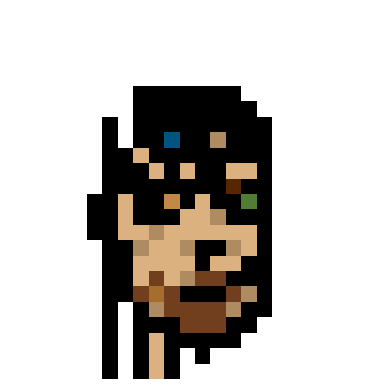

In [14]:
plt.imshow(some_image)
plt.axis('off')
plt.show()


# Tests

In [15]:
test_losses


[0.0015639886278511277,
 0.0015247083501890302,
 0.0013262167395580384,
 0.0011554604159697654,
 0.0010913785118314009]

In [16]:
train_losses


[0.011121441603638232,
 0.0015601903167553246,
 0.0014229516927152872,
 0.0012145076701417566,
 0.001115649522515014]

<function matplotlib.pyplot.show(close=None, block=None)>

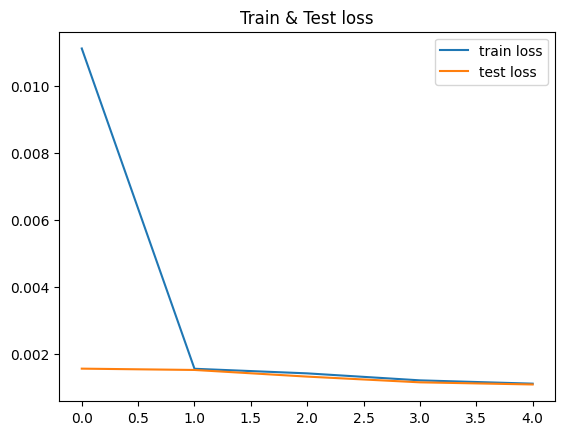

In [17]:
# plt.figure(figsize=(10,5))
plt.title("Train & Test loss")
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show
